## Importing necessary dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [3]:
cal_df = pd.read_csv("/content/drive/MyDrive/datasets/calorie-burnt-prediction-dataset/calories.csv")
cal_df

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [4]:
ex_df = pd.read_csv("/content/drive/MyDrive/datasets/calorie-burnt-prediction-dataset/exercise.csv")
ex_df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


Combining the two dataframes

In [5]:
data = pd.concat([ex_df,cal_df['Calories']], axis=1)

In [6]:
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


## Data Visualization

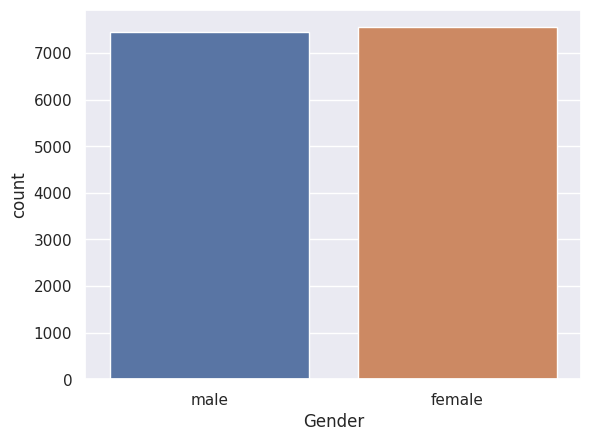

In [11]:
sns.set()

# plotting the gender column in countplot
sns.countplot(data=data, x="Gender")
plt.show()

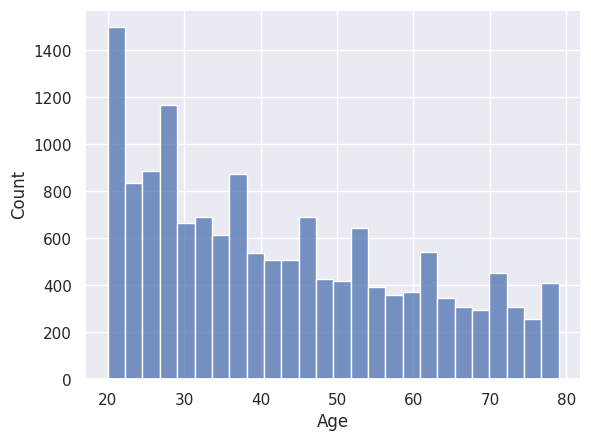

In [13]:
# finding the distribution of "Age" column
sns.histplot(data["Age"])
plt.show()

<Axes: xlabel='Height', ylabel='Count'>

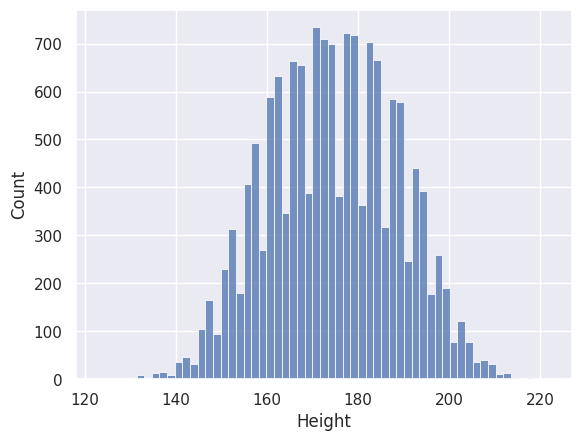

In [15]:
sns.histplot(data["Height"])

<Axes: xlabel='Weight', ylabel='Count'>

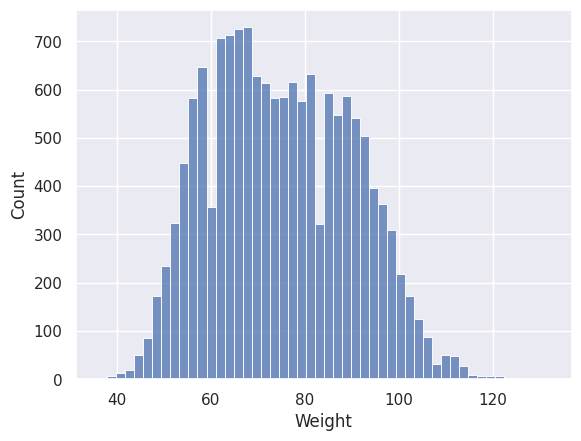

In [16]:
sns.histplot(data["Weight"])

<Axes: xlabel='Duration', ylabel='Count'>

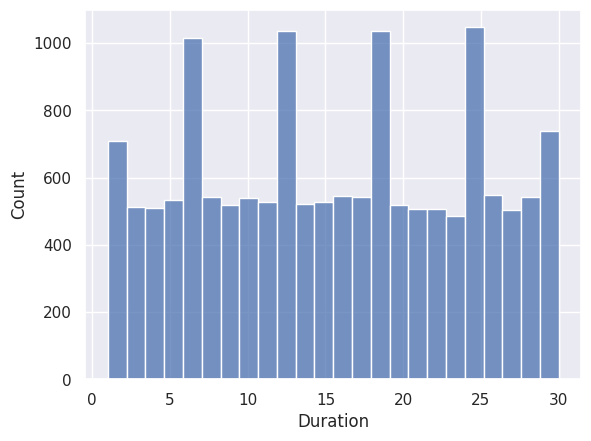

In [18]:
sns.histplot(data["Duration"])

<Axes: xlabel='Heart_Rate', ylabel='Count'>

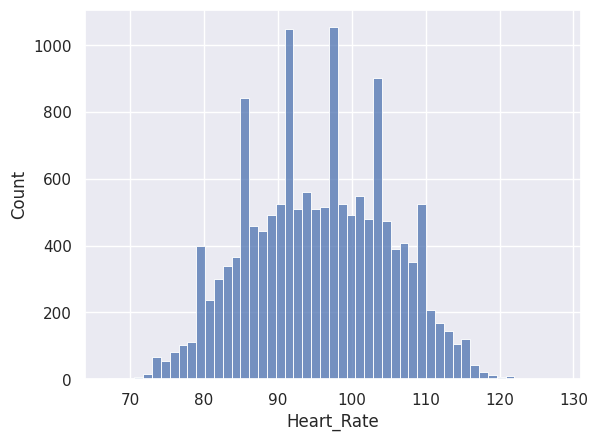

In [19]:
sns.histplot(data["Heart_Rate"])

<Axes: xlabel='Calories', ylabel='Count'>

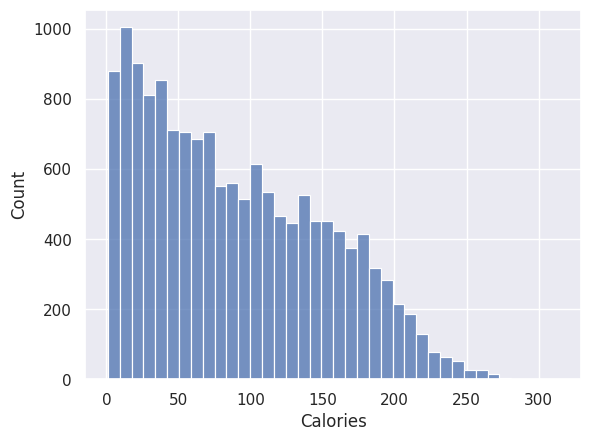

In [20]:
sns.histplot(data["Calories"])

## Finding the correlation between columns

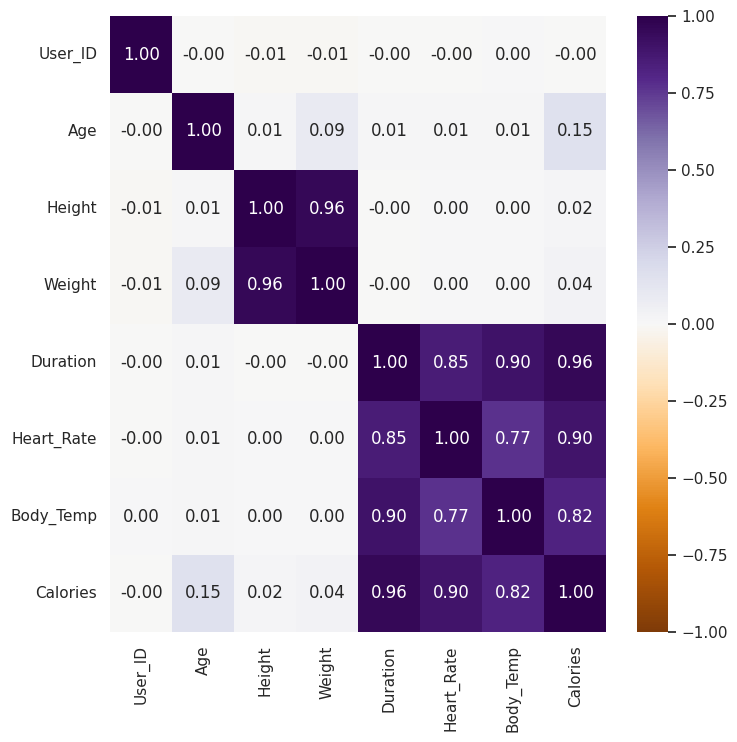

In [26]:
corr = data.corr(numeric_only=True)

plt.figure(figsize=(8,8))

sns.heatmap(corr, cmap="PuOr", vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.show()

## Converting the text to numerical data

In [27]:
data.replace({
    "Gender":{
        "male":0,
        "female":1
    }
}, inplace=True)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


## Splitting into features and labels

In [28]:
x = data.drop(columns=["User_ID","Calories"], axis=1)
y = data["Calories"]

## Splitting into training and tesing data

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, y_test.shape

((12000, 7), (3000,))

## Model training

In [30]:
from xgboost import XGBRegressor

model = XGBRegressor()

In [31]:
# Training the model
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Evaluating the data

In [32]:
y_pred = model.predict(x_test)
y_pred

array([153.53432 ,  23.732754,   9.527623, ..., 167.27759 , 167.6856  ,
       118.09273 ], dtype=float32)

In [34]:
# using mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)

(1.4517203028003374, 0.998951294873563)